<h2 align = "center">Sprawozdanie mofit</h2>
<h4 align="center">Łukasz Puchała, Karol Grzywa</h4>

In [1]:
import numpy as np
from numba import njit
import pandas as pd
import math
import matplotlib.pyplot as plt
from math import sin, cos, pi, e, exp
from scipy.linalg import eigh
import Utilis
import plotly.subplots as sp
import plotly.express as px

m = 0.067 # m0
h = 1
at2meV = 27211.6
omega = 10/at2meV
ab = 0.05292
j = 0 + 1j
at2s = 2.42e-5*1e-12

<h2 align = "center">generowanie macierzy lokalnych </h2>

In [2]:
# grid_raw = Utilis.ReadFile(f'Files/wezly_N_{N}_L_100.dat')
# grid = np.array(grid_raw)

# nlg_raw = Utilis.ReadFile(f'Files/nlg_N_{N}_L_100.dat')
# nlg = np.array(nlg_raw)

<h2>Wyznaczanie macierzy lokalnych - NA POKAZ</h2>

In [3]:
# jt,it,T2 = Utilis.Tmatrix(m,0.0001)
# js,Is,S2 = Utilis.Sloc(a)
# jv,iv,V2 = Utilis.Vkmatrix(11,a,m,omega,nlg, grid)

# Sinit, Hinit = Utilis.Gmatrix(2, nlg, grid, a)
# S2, H2 = Utilis.Gboundary(2, Sinit, Hinit, nlg, grid)

# fig_S = px.imshow(S2, title="S", color_continuous_scale= 'inferno')
# fig_S.show()

# fig_H = px.imshow(H2, title="H", color_continuous_scale= 'viridis')
# fig_H.show()

# Macierze globalne

In [4]:
Ns = np.array([2, 4, 6])
Ls = np.linspace(40, 120, 20)/ab  # wartości L
D = 100 / ab                    # stałe D
Energies = []

for N in Ns:
    En = []
    for L in Ls:
        grid = np.array(Utilis.ReadFile(f'Files/wezly_N_{N}_L_100.dat'))
        nlg  = np.array(Utilis.ReadFile(f'Files/nlg_N_{N}_L_100.dat'))

        a = L / (2*N)
        grid[:,1] *= L/D
        grid[:,2] *= L/D

        Sinit, Hinit = Utilis.Gmatrix(N, nlg, grid, a)
        S, H = Utilis.Gboundary(N, Sinit, Hinit, nlg, grid)

        E, C = eigh(H, S)
        Epos = E.real[E.real > 0]
        En.append(Epos[0])  

    Energies.append(np.array(En))

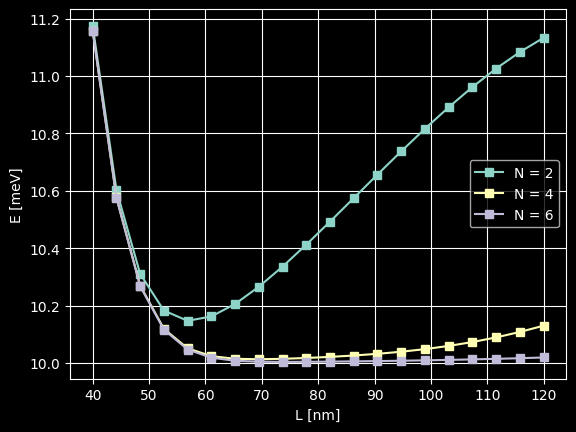

In [5]:
fig, ax = plt.subplots()
for iN, N in enumerate(Ns):
    ax.plot(Ls*ab, Energies[iN]*at2meV, marker = 's', label= f'N = {N}')
ax.set_xlabel('L [nm]')
ax.set_ylabel('E [meV]')
ax.legend()
plt.grid()
plt.show()

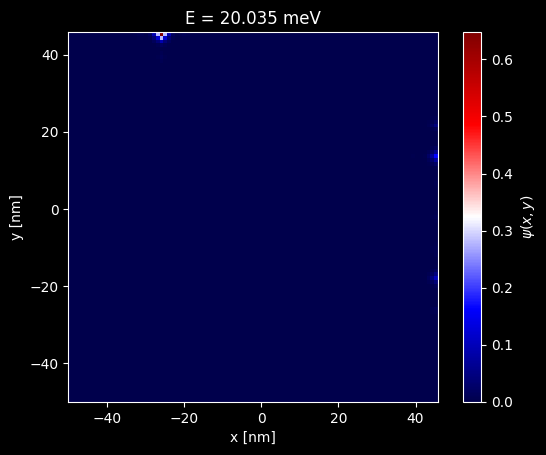

In [11]:
D = 100/ab
N = 6


grid = np.array(Utilis.ReadFile(f'Files/wezly_N_{N}_L_100.dat'))
nlg = np.array(Utilis.ReadFile(f'Files/nlg_N_{N}_L_100.dat'))

L = L = 100/ab
a = L/(2*N)
grid[:,1] *= D/L
grid[:,2] *= D/L

Sinit, Hinit = Utilis.Gmatrix(N, nlg, grid, a)
S, H = Utilis.Gboundary(N, Sinit, Hinit, nlg, grid)
E, C = eigh(H,S)

state_number = 1
idx = np.array(range(len(E)))[E > 0][state_number]

Cn = C[idx]
Psi = Utilis.psi_on_whole_grid(C, n=idx, N=N, nlg=nlg, wezly=grid)

fig, ax = plt.subplots()
cmaps = np.array(['Reds', 'seismic'])
image = ax.imshow(Psi, origin='lower', cmap= cmaps[int(bool(state_number))], extent= (grid[0,1], grid[-1,1], grid[0,2], grid[-1,2]))
fig.colorbar(image, label=r"$\psi(x,y)$")
ax.set_title(f'E = {E[idx]*at2meV:.3f} meV')
ax.set_xlabel('x [nm]')
ax.set_ylabel('y [nm]')
plt.show()